In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of patients
n_patients = 100

# Generate synthetic features
age = np.random.randint(20, 80, n_patients)              # Age: 20-80
gender = np.random.choice([0,1], n_patients)             # Gender: 0=M, 1=F
fever = np.random.choice([0,1], n_patients)              # Fever: 0=No, 1=Yes
fatigue = np.random.choice([0,1], n_patients)            # Fatigue: 0=No, 1=Yes
heart_rate = np.random.randint(60, 100, n_patients)      # Heart rate: 60-100 bpm

# Generate recovery days (target) based on logic + noise
recovery_days = (
    0.1*age + 2*fever + 1.5*fatigue + 0.05*heart_rate + np.random.normal(0,1,n_patients)
).round()
recovery_days = np.clip(recovery_days, 3, 20)  # limit to 3-20 days

# Create DataFrame
data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'Fever': fever,
    'Fatigue': fatigue,
    'HeartRate': heart_rate,
    'RecoveryDays': recovery_days
})

data.head()


,Age,Gender,Fever,Fatigue,HeartRate,RecoveryDays
0,58,1,0,0,84,10.0
1,71,0,0,0,94,10.0
2,48,1,0,1,84,11.0
3,34,0,1,0,88,9.0
4,62,1,0,0,77,11.0


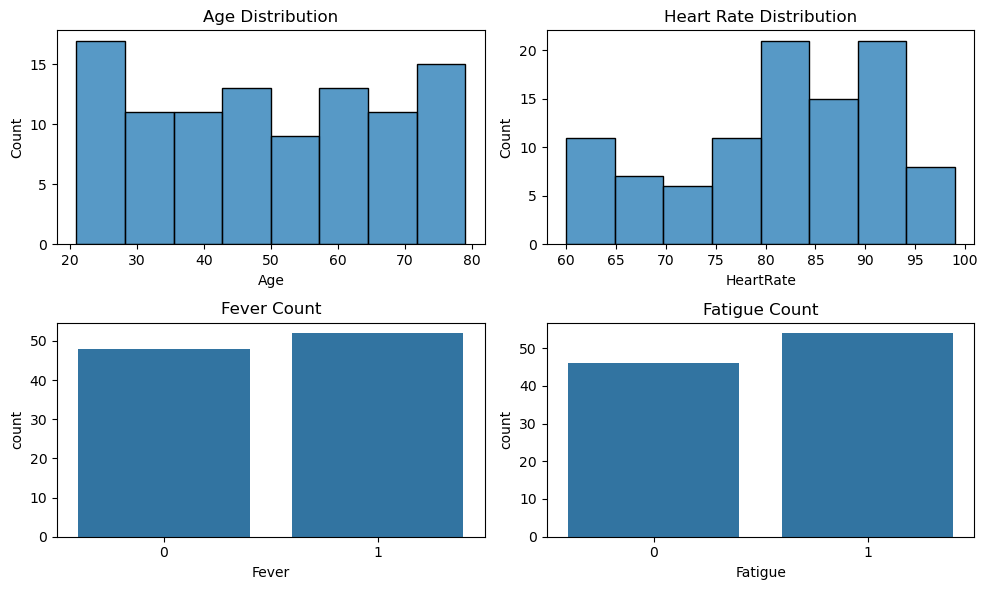

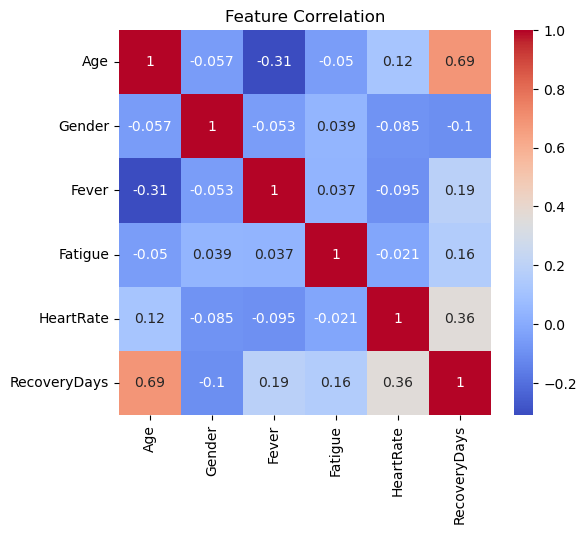

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature distributions
fig, axes = plt.subplots(2, 2, figsize=(10,6))
sns.histplot(data['Age'], ax=axes[0,0]).set(title='Age Distribution')
sns.histplot(data['HeartRate'], ax=axes[0,1]).set(title='Heart Rate Distribution')
sns.countplot(x='Fever', data=data, ax=axes[1,0]).set(title='Fever Count')
sns.countplot(x='Fatigue', data=data, ax=axes[1,1]).set(title='Fatigue Count')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [3]:

from sklearn.model_selection import train_test_split

X = data.drop('RecoveryDays', axis=1)
y = data['RecoveryDays']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 80
Testing samples: 20


In [4]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


In [5]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)


In [6]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"- Mean Squared Error: {mse:.2f}")
    print(f"- R2 Score: {r2:.2f}")
    print("---")
    return mse

mse_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
mse_dt = evaluate_model(y_test, y_pred_dt, "Decision Tree")


Linear Regression Performance:
- Mean Squared Error: 1.26
- R2 Score: 0.74
---
Decision Tree Performance:
- Mean Squared Error: 2.25
- R2 Score: 0.53
---


In [7]:
import pickle

# Choose model with lower MSE
best_model = lr_model if mse_lr < mse_dt else dt_model

with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Best-performing model saved as model.pkl")


Best-performing model saved as model.pkl


In [8]:
# New patient example: Age=45, Gender=M, Fever=Yes, Fatigue=Yes, HeartRate=85
new_patient = pd.DataFrame([[45, 0, 1, 1, 85]], columns=X.columns)

predicted_days = best_model.predict(new_patient)[0]
print(f"Predicted Recovery Days: {predicted_days:.1f} days")


Predicted Recovery Days: 12.3 days
